In [1]:
# Based on example 1 in Robust verification as a linear program. 
import numpy as np
import sparse
from best.models.pomdp import POMDP, POMDPNetwork
from best.solvers.occupation_lp import *



In [2]:
network = POMDPNetwork()

T0 = np.array([[5/12, 1/3, 1/4, 0],
               [0, 1/2, 0, 0.5],
               [0, 0, 1, 0],
               [0, 1/2, 0 , 1/2]]);

network.add_pomdp(POMDP([T0], input_names=['a'], state_name='s'))

T0 = np.array([[1, 0],
               [0, 1]]);
T1 = np.array([[0, 1],
               [0, 1]]);

network.add_pomdp(POMDP([T0, T1], input_names=['l'], state_name='q'))

network.add_connection(['s'], 'l', lambda s: {0: set([0]), 1: set([0]), 2: set([1]),  3: set([0])}[s])

# Define target set
accept = np.zeros((4,2))
accept[:,1] = 1

val_list, pol_list = solve_reach(network, accept)
print(val_list)

P_asS = diagonal(get_T_uxXz(network.pomdps['s']), 2, 3)
print(P_asS.todense())
P_lqQ = diagonal(get_T_uxXz(network.pomdps['q']), 2, 3)
print(P_lqQ.todense())
conn = network.connections[0][2]
print(conn)

finished after 0.02s and 12 iterations
[array([[0.42857, 1.     ],
       [0.     , 1.     ],
       [1.     , 1.     ],
       [0.     , 1.     ]]), array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)]
[[[0.41667 0.33333 0.25    0.     ]
  [0.      0.5     0.      0.5    ]
  [0.      0.      1.      0.     ]
  [0.      0.5     0.      0.5    ]]]
[[[1. 0.]
  [0. 1.]]

 [[0. 1.]
  [0. 1.]]]
[[ True  True False  True]
 [False False  True False]]


In [3]:

reach_prob, val2 = solve_robust(P_asS, P_lqQ, conn, s0=0, q0=0, q_target=1)
np.testing.assert_almost_equal(reach_prob, val_list[0][0, 0],decimal=5)
print(reach_prob)

print(val2)


Academic license - for non-commercial use only
0.42857142127290077
[[[1.71429]
  [1.14286]
  [0.     ]
  [0.     ]]]


In [4]:
delt = []
reach = []
val = []
for delta in np.linspace(0.01,0.3,20):
    delt+= [delta]
    reach_prob, val2 = solve_delta(P_asS, P_lqQ, conn,delta, s0=0, q0=0, q_target=1)
    reach += [reach_prob]
    val +=[val2]
    print(val2)


[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[1.71429]
  [0.     ]
  [0.     ]
  [0.     ]]]
[[[0.]
  [0.]
  [0.]
  [0.]]]
[[[0.]
  [0.]
  [0.]
  [0.]]]
[[[0.]
  [0.]
  [0.]
  [0.]]]
[[[0.]
  [0.]
  [0.]
  [0.]]]


In [4]:
import matplotlib.pyplot as plt
plt.plot(delt,reach)
plt.ylabel('Robust reach probability')
# plt.show()
import matplotlib2tikz
matplotlib2tikz.save("test.tex")
vals= np.array(val).reshape(20,4)
plt.plot(delt,vals[::,0])
plt.plot(delt,vals[::,1])

plt.plot(delt,vals[::,2])

plt.plot(delt,vals[::,3])

plt.ylabel('Robust reach probability')
plt.legend(['$P_\delta$','x1','x2','x3','x4'])
# plt.show()
print(np.array(val).reshape(20,4))


NameError: name 'delt' is not defined

In [1]:


from Demos.demo_Models import simple_robot
import polytope as pc
import numpy as np

Robot = simple_robot()  

Robot.input_space = pc.box2poly(np.kron(np.ones((Robot.m, 1)), np.array([[-1, 1]])))  # continuous set of inputs
Robot.state_space = pc.box2poly(np.kron(np.ones((Robot.dim, 1)), np.array([[-10, 10]])))  # X space


from Demos.Robot_navigation import specify_robot
from Controller.Specifications import Fsa

# specify required behaviour
formula, regions = specify_robot()  # type: dict

fsaform = Fsa()  # this is a FSA , contains a digraph
fsaform.from_formula(formula)  # given a more complex formula


print("The synthesised formula is:", formula)

print("-------Grid the robots state space------")
#  set the state spaces:
from Reduce.Gridding import grid as griddd


d_opt = np.array([[0.69294], [0.721]])  # tuned gridding ratio from a previous paper
d = 4 * d_opt  # with distance measure 0.6=default
un = 3


Load robot model: Simple integrator model
[[0.31623 0.     ]
 [0.      0.31623]]
The synthesised formula is: ( ( ( !obst & !col ) U pac ) & ( !obst U col ) )
-------Grid the robots state space------


In [ ]:
## real computations
Ms, srep = griddd(Robot, d, un=un)
 

A matrix has shape: (2, 2)
A matrix has shape: (2, 2)


In [ ]:
# print(Ms.transition)
from Controller.Robust import Robust_control

ro_pol = Robust_control(Ms, fsaform, regions, 0.1, 0, M=None)
print(ro_pol.mdp.transition)
# ro_pol.init_V()
#
# number_of_backups = 40
# for i in range(number_of_backups):
#     ro_pol.back_up()  # do 40


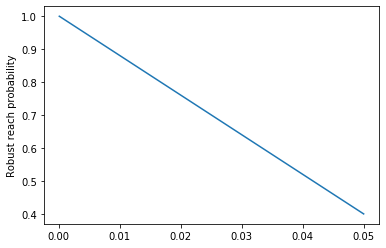

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(0.0001, 0.05, 20),
         np.array([0.9988015825936024,
                   0.9673308349680869,
                   0.9358596986225345, 0.9043885757283697, 0.8729177821452127, 0.8414466714726648, 0.8099756746650105, 0.7785046283755153,
                   0.7470336135892648, 0.7155626633000725,
                   0.684091534804651, 0.6526205881521279,
                   0.6211494561306404, 0.5896785112343874, 0.5582075747944356,
                   0.5267363813555599, 0.49526541661552426,
                   0.4637944882501633, 0.43232333688252694,
                   0.4008524088427438]))
plt.ylabel('Robust reach probability')

plt.show()